# Individual Planning Report

DSCI 100 003  
Wendy Liao, Group 16

In [2]:
library(tidyverse) 
library(repr)
library(tidymodels)
library(GGally)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

## 1. Data Description 

- There are 2 different data files: 1. Sessions 2. Players 

### 1. **Sessions**

- Total 5 variables
- 1535 observations
- every observation is a full observation (no "N/A")

| Variable               | Data Type |           Meaning                                     |
| -----------------------| --------- |-------------------------------------------------------|
|hashedEmail             |   chr     | participant email that has been hashed                | 
|start_time              |   chr     |participant start time in 24 hour clock and dd/mm/yyyy |
| end_time               |   chr     |participant end time in 24 hour clock  and dd/mm/yyyy  |
|original_start_time     |   dbl     |participant UNIX timestamp of date and time started     |
|original_end_time_time  |   dbl     |participant UNIX timestamp of date and time ended       | 

- **Issues**
    1. variable name hashedEmail is not in snake_case
    2. start_time has 2 variables recorded seperately: date and time (e.g. 30/06/2024 18:12)
    3. end_time has 2 variables2 variables recorded seperately: date and time (e.g. 30/06/2024 18:24)
    4. start_time and end_time are chr, depending on question, may have to turn into dbl 

### 2. **Players**

- total 7 variables
- total 196 observations (participants)
- one of the Age observations contains an "NA"

  
| Variable  | Data Type | Meaning|
| --------- | --------- |--------|
|experience | chr  |participant level of experience in Minecraft (Beginner, Amateur, Regular, Veteran,Pro)| 
|subscribe  |  lgl |whether or not (True/False) participant is subscribed to game-related newsletter|
|hashedEmail|chr|participant email that has been hashed |
| played_hours| dbl |hours played in Minecraft  |
|name  |   chr  |  Participant name |
|gender|chr|Gender of participant |
|Age | dbl |participant age|

- **Issues**
    1. variable name hashedEmail is not in snake_case
    2. Age variable is not in snake_case (very small issue, however, inconsistent)
    3. "NA" in Age variable 
       
<br>

- **Summary Statistics**


| Variable      | Mean    | Min | Max |
| ------------- | ------- | --- | --- |
| played_hours  | 5.85    |0    |223.1|
| Age           |  21.14  | 9   | 58  |


In [3]:
sessions_url <- "https://raw.githubusercontent.com/whendyliow/ds_100_project/refs/heads/main/sessions.csv" 
sessions <- read_csv(sessions_url) 
players_url <- "https://raw.githubusercontent.com/whendyliow/ds_100_project/refs/heads/main/players.csv"
players <- read_csv(players_url) 

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
played_hours_summary <- players |>
    select(played_hours) |>
    summarize( min_played_hours = min(played_hours), 
               max_played_hours = max(played_hours),
               mean_played_hours = mean(played_hours)) 
played_hours_summary

ages_summary <- players |>
    select(Age) |>
    summarize( min_age = min(Age, na.rm = TRUE), 
               max_age = max(Age, na.rm = TRUE),
               mean_age = mean(Age, na.rm = TRUE)) 
ages_summary

# subscribe_summary <- players |>
#     select(subscribe, hashedEmail) |>
#     group_by(subscribe = as_factor(subscribe)) |>
#     summarize(count = n())
# subscribe_summary


min_played_hours,max_played_hours,mean_played_hours
<dbl>,<dbl>,<dbl>
0,223.1,5.845918


min_age,max_age,mean_age
<dbl>,<dbl>,<dbl>
9,58,21.13918


## 2. Question 

**Question**: Can the participant's experience predict the amount of played hours in the players dataset? 

- I will not need the sessions dataset to complete this question, as the question only retains to the players dataset
- In wrangling the data:
    - select the played_hours and experience columns
    - turn the experience column into a fct from a chr

## 3. Exploratory Data Analysis and Visualization


In [5]:
head(players) # loaded already in some cells above 

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [6]:
# tidying data 
players_tidy <- players |>
    rename(hashed_email = hashedEmail, 
           age = Age) |>
    mutate(experience = as_factor(experience))
head(players_tidy)

experience,subscribe,hashed_email,played_hours,name,gender,age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [7]:
# mean values for every quantitative variable 

players_mean <- players_tidy |>
    select(played_hours, age) |>
    summarize(played_hours_mean = mean(played_hours), 
              age_mean = mean(age, na.rm = TRUE)) 
players_mean


played_hours_mean,age_mean
<dbl>,<dbl>
5.845918,21.13918


#### Means of quantitative variables in players.csv
| Variable | Mean | 
| ---- | ---- |
| played_hours | 5.86 | 
| age | 21.14| 


experience,count
<fct>,<int>
Pro,14
Veteran,48
Amateur,63
Regular,36
Beginner,35


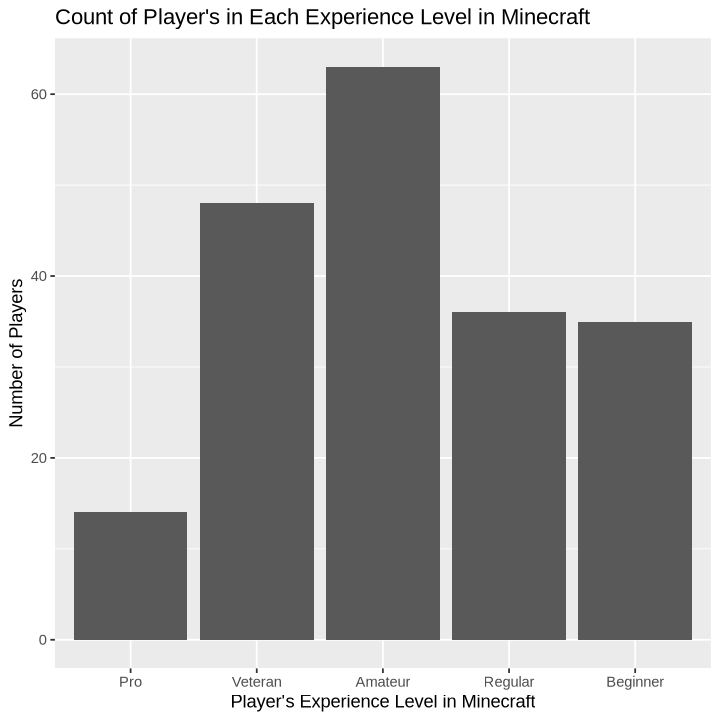

In [8]:
# exploratory visualizations #1 
options(repr.plot.width = 6, repr.plot.height = 6)

experience_summary <- players |>
    select (experience, hashedEmail) |>
    group_by(experience = as_factor(experience)) |>
    summarize(count = n()) 
experience_summary 

players_experience_plot <- experience_summary |> 
    ggplot(aes(x = experience, y = count)) +
    geom_bar(stat = "identity") + 
    xlab("Player's Experience Level in Minecraft") + 
    ylab("Number of Players") + 
    ggtitle("Count of Player's in Each Experience Level in Minecraft") 
players_experience_plot 

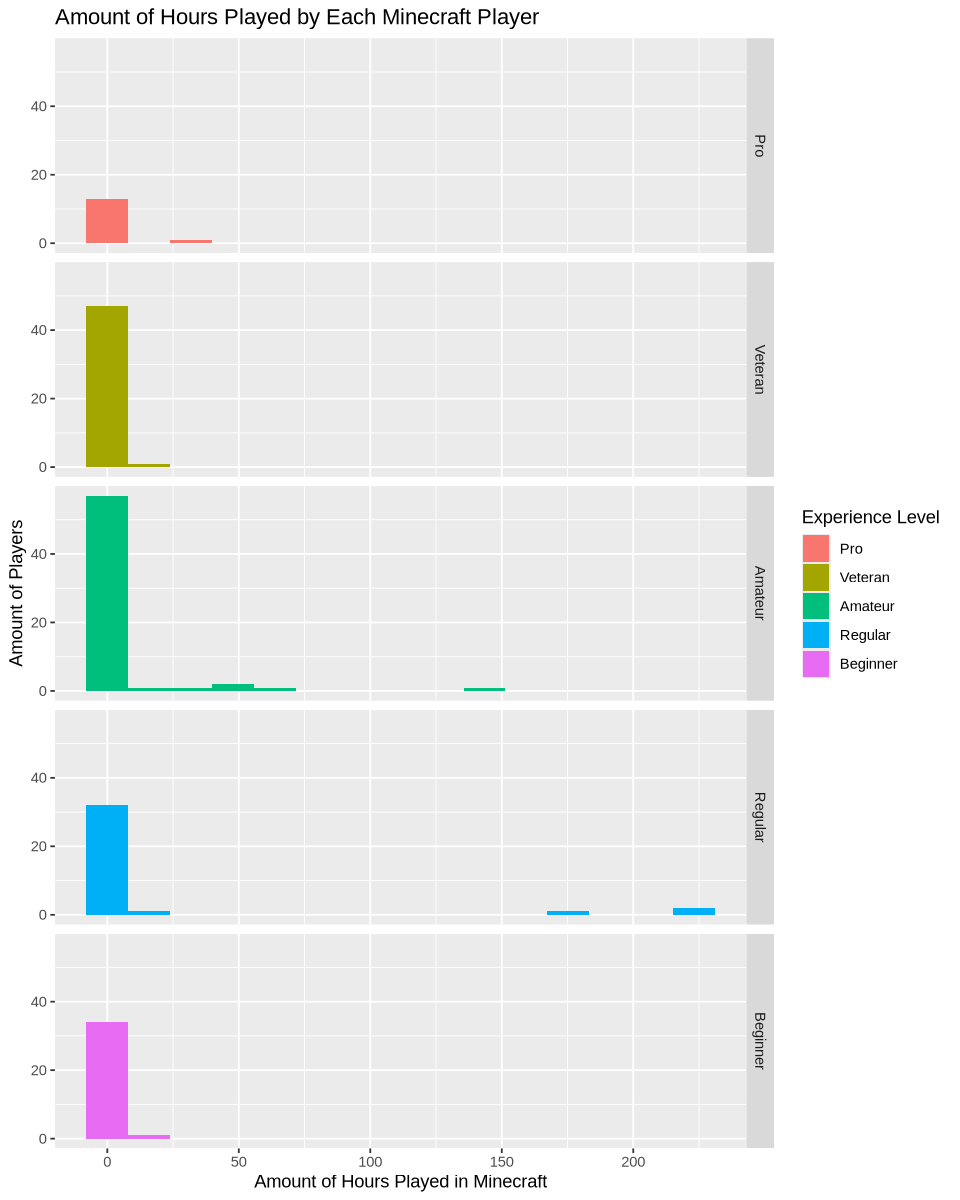

In [9]:
# exploratory visualizations #2 
options(repr.plot.width = 8, repr.plot.height = 10)

players_plot <- players_tidy |> 
    ggplot(aes(x = played_hours, fill = experience)) + 
    geom_histogram(position = "identity", bins = 15) + 
    xlab("Amount of Hours Played in Minecraft") + 
    ylab("Amount of Players") + 
    labs(fill = "Experience Level") +
    ggtitle("Amount of Hours Played by Each Minecraft Player") +
    facet_grid(experience ~.)
players_plot

#### Insights From Visualizations 

From the first visualization: 
- see how many people are in each category of experience
- Most: Amateur, Least: Pro
- Lets me know that I have disproportionate amounts of data for each level

From the second visualization: 
- see the distribution of amount of hours played in minecraft for each level of experience
- see that in most of the experience levels, most played 0 hours or very few hours
- the distributions are very skewed 

## 4.  Methods and Plan


Propose one method to address your question of interest using the selected dataset and explain why it was chosen.
Why is this method appropriate?

Which assumptions are required, if any, to apply the method selected?
What are the potential limitations or weaknesses of the method selected?
How are you going to compare and select the model?
How are you going to process the data to apply the model? For example: Are you splitting the data? How? How many splits? What proportions will you use for the splits? At what stage will you split? Will there be a validation set? Will you use cross validation?
